In [27]:
import functools
import matplotlib.pyplot as plt
import numpy as np

# 算術平均

- 相加平均とも言う。
- いわゆる普通の平均。
- 外れ値の影響を受けやすい。

In [8]:
data = [64, 25, 87, 56, 61, 96, 91, 98, 12, 88, 50, 45, 65, 42, 65, 66, 47, 21, 82, 58]
sum(data)/len(data)

60.95

# 加重平均

- 項目ごとに重み付けをした平均。


# 幾何平均

- 相乗平均とも言う。
- データの積のn乗根を取る。
- 外れ値の影響を受けにくい。
- 変化率の平均など、比率の平均値にも適している。

## 外れ値があるケース

In [7]:
# 算術平均
data = [1, 2, 3, 1, 2, 3, 9]
sum(data)/len(data)

3.0

In [6]:
# 幾何平均
data = [1, 2, 3, 1, 2, 3, 9]
functools.reduce((lambda x, y : x * y), data)**(1/len(data))

2.2837538219638014

## 変化率の場合

In [24]:
# 算術平均
data = [1.5, 2.0, 2.5, 3.0, 3.5]
sum(data)/len(data)

2.5

In [25]:
# 幾何平均
data = [1.5, 2.0, 2.5, 3.0, 3.5]
functools.reduce((lambda x, y : x * y), data)**(1/len(data))

2.3946944765934943

In [26]:
first_value = 100
data = [1.5, 2.0, 2.5, 3.0, 3.5]

functools.reduce((lambda x, y : x * y), data, first_value)

7875.0

In [31]:
first_value = 100
data = [2.5, 2.5, 2.5, 2.5, 2.5]

functools.reduce((lambda x, y : x * y), data, first_value)

9765.625

In [33]:
first_value = 100
data = [2.394, 2.394, 2.394, 2.394, 2.394]

functools.reduce((lambda x, y : x * y), data, first_value)

7863.587621394424

# 移動平均

- 時系列のデータに対して、変化を緩やかにするのに使う。

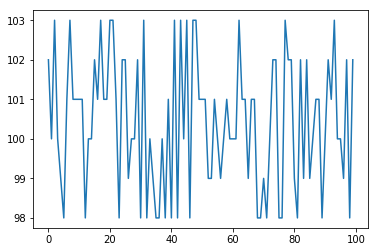

In [12]:
data = [102, 100, 103, 100, 99, 98, 101, 103, 101, 101, 101, 101, 98, 100, 100, 102, 101, 103, 101, 101, 103, 103, 101, 98, 102, 102, 99, 100, 100, 102, 98, 103, 98, 100, 99, 98, 98, 100, 98, 101, 98, 103, 98, 103, 100, 103, 98, 103, 103, 101, 101, 101, 99, 99, 101, 100, 99, 100, 101, 100, 100, 100, 103, 101, 101, 99, 101, 101, 98, 98, 99, 98, 100, 102, 102, 98, 98, 103, 102, 102, 99, 98, 102, 99, 102, 99, 100, 101, 101, 98, 100, 102, 101, 103, 100, 100, 99, 102, 98, 102]

plt.plot(data)

In [30]:
data = np.array([1, 2, 3, 4, 5])
list(zip(data, np.roll(data, -1), np.roll(data, -2)))
np.roll(data, -1)

array([2, 3, 4, 5, 1])

In [25]:
[1, 2, 3].pop(0)

1